<a href="https://colab.research.google.com/github/sabaagizew/10Acadamey_week-3/blob/main/week3_sales_pridict_prophet_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import warnings
warnings.filterwarnings("ignore")

import os
import logging
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))

# loading packages
# basic + dates 
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
import sys, os
import json
import requests
import time
import datetime as dt
from datetime import date, timedelta, datetime

from itertools import repeat
import itertools

import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as ss
from random import randint




In [98]:
pip install mlflow


In [99]:
## import packages

import pandas as pd

##
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import mlflow
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pickle # Read and Save model - Serialization

import warnings
warnings.filterwarnings('ignore')

import datetime
import math
import calendar


In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
log = logging.getLogger()
log.info('check')

INFO:root:check


In [102]:
# Read Datas

store_file = '../data/store.csv'
test_file = '../data/test.csv'
train_file = '../data/train.csv'

In [103]:
store_file= pd.read_csv('drive/MyDrive/main/store.csv')

In [104]:
test_file= pd.read_csv('drive/MyDrive/main/test.csv')

In [105]:
train_file=pd.read_csv('drive/MyDrive/main/train.csv')

In [106]:
train_file["Date"]=pd.to_datetime(train_file["Date"], format='%Y/%m/%d', errors='coerce')
test_file["Date"]=pd.to_datetime(test_file["Date"], format='%Y/%m/%d', errors='coerce')

def holiday(x):
    if x in ['a','b','c']:
        return 1
    return 0
    
def day_month_year(df, col):
    days, months, years = [], [], []
    for datetime in df[col]:
        year, month, day = str(datetime).split(' ')[0].split('-')
        days.append(int(day))
        months.append(int(month))
        years.append(int(year))
    df['Day'] = days
    df['Month'] = months
    df['Year'] = years
    
train_file['Holiday'] = train_file['StateHoliday'].apply(holiday)
test_file['Holiday'] = test_file['StateHoliday'].apply(holiday)

train_file['Holiday'] = train_file['Holiday'] | train_file['SchoolHoliday']
test_file['Holiday'] = test_file['Holiday'] | test_file['SchoolHoliday']

day_month_year(train_file, 'Date')
day_month_year(test_file, 'Date')

In [107]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
 8   Holiday        41088 non-null  int64         
 9   Day            41088 non-null  int64         
 10  Month          41088 non-null  int64         
 11  Year           41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(1)
memory usage: 3.8+ MB


In [108]:
train_file['Date'] = pd.to_datetime(train_file['Date'])
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Holiday        1017209 non-null  int64         
 10  Day            1017209 non-null  int64         
 11  Month          1017209 non-null  int64         
 12  Year           1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 100.9+ MB


In [109]:
store_file

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [110]:
store_file.Promo2.value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [111]:
train_file.head()
train_file.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [112]:
test_file.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Holiday,Day,Month,Year
0,1,1,4,2015-09-17,1.0,1,0,0,0,17,9,2015
1,2,3,4,2015-09-17,1.0,1,0,0,0,17,9,2015
2,3,7,4,2015-09-17,1.0,1,0,0,0,17,9,2015
3,4,8,4,2015-09-17,1.0,1,0,0,0,17,9,2015
4,5,9,4,2015-09-17,1.0,1,0,0,0,17,9,2015


In [113]:
train_file

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holiday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,1,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,1,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,1,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,1,1,2013


In [114]:
store_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [115]:
store_file.isna().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [116]:
store_file.isna().any() # is null

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [117]:
store_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [118]:
store_file.isnull().sum() / store_file.shape[0] * 100.00

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [119]:
# No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values
store_file['CompetitionDistance'].fillna(store_file['CompetitionDistance'].median(), inplace = True)

In [120]:
store_file.fillna(0, inplace = True)
store_file.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [121]:
# To see the percentage of missing values of every columns
def every_column_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing', inplace=True)

    print(missing_value_df)


every_column_percent_missing(store_file)

                                         column_name  percent_missing
Store                                          Store              0.0
StoreType                                  StoreType              0.0
Assortment                                Assortment              0.0
CompetitionDistance              CompetitionDistance              0.0
CompetitionOpenSinceMonth  CompetitionOpenSinceMonth              0.0
CompetitionOpenSinceYear    CompetitionOpenSinceYear              0.0
Promo2                                        Promo2              0.0
Promo2SinceWeek                      Promo2SinceWeek              0.0
Promo2SinceYear                      Promo2SinceYear              0.0
PromoInterval                          PromoInterval              0.0


In [122]:
## Store and Train
train_store = pd.merge(train_file, store_file, how='inner', on='Store')
train_store['StateHoliday'] = train_store['StateHoliday'].apply(lambda x: str(x))
train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Holiday,Day,Month,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,1,31,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,1,30,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,1,29,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,1,28,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,1,27,7,2015,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,1,5,1,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,1,4,1,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,1,3,1,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,1,2,1,2013,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [123]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Holiday                    1017209 non-null  int64         
 10  Day                        1017209 non-null  int64         
 11  Month                      1017209 no

In [124]:
print("Training data starts from: {}".format(train_file.Date.min()))
print("Training data end on: {}".format(train_file.Date.max()))
print()
print("Testing data starts from: {}".format(test_file.Date.min()))
print("Testing data end on: {}".format(test_file.Date.max()))

Training data starts from: 2013-01-01 00:00:00
Training data end on: 2015-07-31 00:00:00

Testing data starts from: 2015-08-01 00:00:00
Testing data end on: 2015-09-17 00:00:00


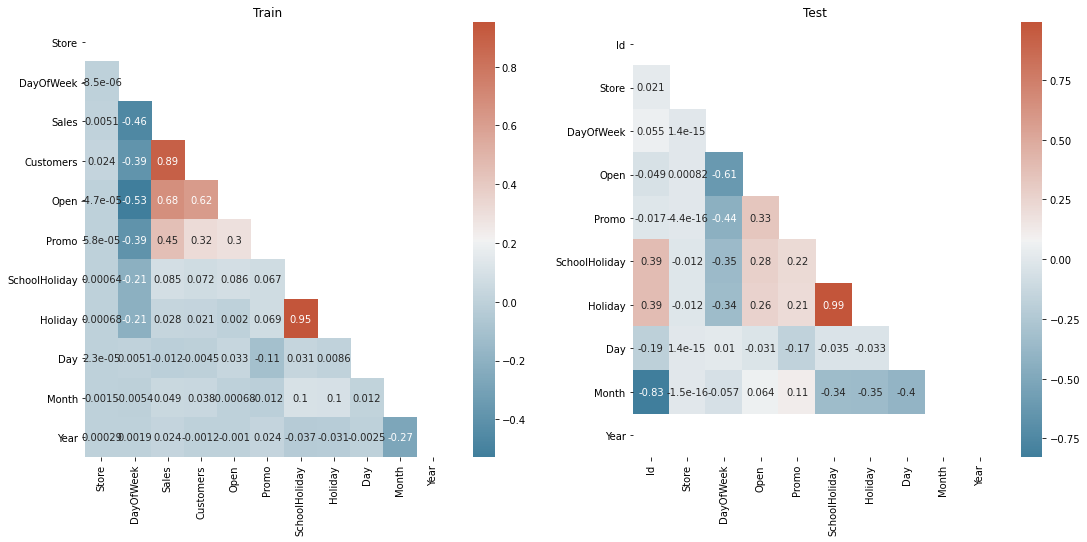

In [125]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = train_file.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(train_file.corr(), mask=mask, cmap=cmap, annot=True, ax=ax1)
ax1.set_title('Train')
corr = test_file.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(test_file.corr(), mask=mask, cmap=cmap, annot=True, ax=ax2)
ax2.set_title('Test')
plt.show()

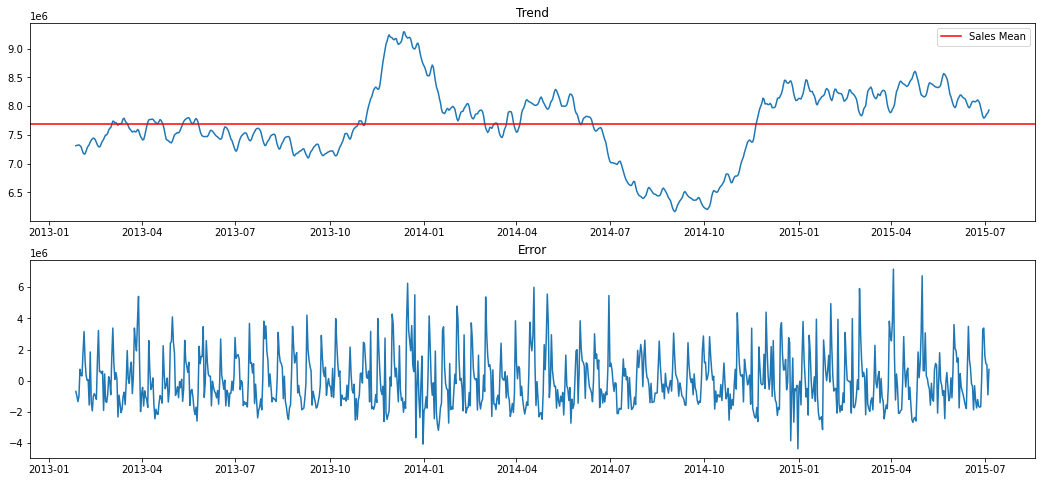

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
temp_df = train_file.copy()
temp_df.Date = pd.to_datetime(temp_df.Date)
temp_df.index = temp_df.Date
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')
temp_df = temp_df[['Sales']]
temp_df = temp_df.groupby(temp_df.index).sum()
result = seasonal_decompose(temp_df, model='additive', freq=52)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,8))
ax1.plot(result.trend)
ax1.axhline(y = temp_df.Sales.mean(), color = 'r', linestyle = '-', label='Sales Mean')
ax1.set_title("Trend")
ax2.plot(result.resid)
ax2.set_title("Error")
ax1.legend()

In [127]:
features_x = ['Store', 'Date', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday']
features_y = ['SalesLog']

In [128]:
train_file['is_train'] = 1
test_file['is_train'] = 0
df = pd.concat([train_file, test_file])

In [129]:
df.Date = pd.to_datetime(df.Date)

In [130]:
df = df.loc[~((df['Open'] == 1) & (df['Sales'] == 0))]

In [131]:
df.StateHoliday = df.StateHoliday.map({0:'0', 'a':'a', 'b':'b', 'c':'c', '0':'0'}) #mixed data types
df.StateHoliday = LabelEncoder().fit_transform(df.StateHoliday) #Encoding for XG Boost

In [132]:
var_name = 'Date'

df[var_name + 'Day'] = df[var_name].dt.day #addding day
df[var_name + 'Week'] = df[var_name].dt.week #adding week
df[var_name + 'Month'] = df[var_name].dt.month #adding month
df[var_name + 'Year'] = df[var_name].dt.year #adding year
df[var_name + 'DayOfYear'] = df[var_name].dt.dayofyear #adding dayofyear

features_x.remove(var_name) #removing Date
features_x.append(var_name + 'Day')
features_x.append(var_name + 'Week')
features_x.append(var_name + 'Month')
features_x.append(var_name + 'Year')
features_x.append(var_name + 'DayOfYear')

In [133]:
store_file.StoreType = LabelEncoder().fit_transform(store_file.StoreType) #encoding StoreType
store_file.Assortment = LabelEncoder().fit_transform(store_file.Assortment)

In [134]:
join_with = store_file['PromoInterval'].str.split(',').apply(pd.Series)
join_with.columns = join_with.columns.map(lambda x: str(x) + '_PromoInterval')
store = store_file.join(join_with) #joining splits

In [135]:
def monthToNum(value):
    if(value=='Sept'):
        value='Sep'
    return list(calendar.month_abbr).index(value)
#mapping month abbr to month number
store['0_PromoInterval'] = store['0_PromoInterval'].map(lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
store['1_PromoInterval'] = store['1_PromoInterval'].map(lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
store['2_PromoInterval'] = store['2_PromoInterval'].map(lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
store['3_PromoInterval'] = store['3_PromoInterval'].map(lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)

In [148]:
competition_open = []
for index, value in store[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].iterrows():
    try:
        year, month = int(value['CompetitionOpenSinceYear']), int(value['CompetitionOpenSinceMonth'])
        date = pd.to_datetime("{}-{}-01".format(year, month), format='%Y-%m')
        competition_open.append(date)
    except:
        competition_open.append(np.nan)
competition_open = pd.Series(competition_open)
competition_open.shape

(1115,)

In [149]:
store['CompetitionOpen'] = competition_open #converted int to datetime
store['CompetitionOpen'] = store.CompetitionOpen.dt.strftime('%Y%m%d')

In [150]:
promo = []
for index, value in store[['Promo2SinceWeek', 'Promo2SinceYear']].iterrows():
    try:
        year, week = int(value['Promo2SinceYear']), int(value['Promo2SinceWeek'])
        date = pd.to_datetime("{}-{}-01".format(year, week), format='%Y%W')
        promo.append(date)
    except:
        promo.append(np.nan)
promo = pd.to_datetime(pd.Series(competition_open))
promo.shape

(1115,)

In [151]:
store['PromoSince'] = promo #converted int to datetime
store['PromoSince'] = store.PromoSince.dt.strftime('%Y%m%d')

In [152]:
store_features = ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
                  'PromoSince', '0_PromoInterval']
#1_PromoInterval, 2_PromoInterval, 3_PromoInterval irrelevent

In [153]:
df = pd.merge(df, store[store_features], how='left', on=['Store'])

In [154]:
features_x = list(set(features_x + store_features))

In [155]:
for feature in features_x:
    df[feature] = df[feature].fillna(-999) #out of range value for model

In [156]:
df['DateInt'] = df.Date.dt.strftime('%Y%m%d').map(int) #mapping to Int
df['CompetitionOpen'] = df.CompetitionOpen.map(int)
df['PromoSince'] = df.PromoSince.map(int)

In [157]:
df['Zscore'] = (df.Sales - df.Sales.mean())/df.Sales.std()

In [158]:
thresh=4.0
def check_outlier(value):
    if(value>=thresh):
        return True
    else:
        return False

df['Outlier'] = df.Zscore.apply(check_outlier)

In [159]:
store_data_sales = df.groupby([df['Store']])['Sales'].sum()
store_data_customers = df.groupby([df['Store']])['Customers'].sum()
store_data_open = df.groupby([df['Store']])['Open'].count()

store_data_sales_per_day = store_data_sales / store_data_open
store_data_customers_per_day = store_data_customers / store_data_open
store_data_sales_per_customer_per_day = store_data_sales_per_day / store_data_customers_per_day

df_store = pd.merge(store, store_data_sales_per_day.reset_index(name='SalesPerDay'), how='left', on=['Store'])
df_store = pd.merge(df_store, store_data_customers_per_day.reset_index(name='CustomersPerDay'), how='left', on=['Store'])
df_store = pd.merge(df_store, store_data_sales_per_customer_per_day.reset_index(name='SalesPerCustomersPerDay'), how='left', on=['Store'])
store_features = ['Store', 'SalesPerDay', 'CustomersPerDay', 'SalesPerCustomersPerDay']

features_x = list(set(features_x + store_features))
df = pd.merge(df, df_store[store_features], how='left', on=['Store'])

In [160]:
holidays_each_day_of_week = df.groupby(df.DayOfWeek).sum().StateHoliday
df = pd.merge(df, holidays_each_day_of_week.reset_index(name='HolidaysPerDayOfWeek'), on=['DayOfWeek'])

In [161]:
school_holidays_each_day_of_week = df.groupby(df.DayOfWeek).sum().SchoolHoliday
df = pd.merge(df, school_holidays_each_day_of_week.reset_index(name='SchoolHolidaysPerDayOfWeek'), on=['DayOfWeek'])

In [162]:
promo_each_day_of_week = df.groupby(df.DayOfWeek).sum().Promo
df = pd.merge(df, promo_each_day_of_week.reset_index(name='PromoPerDayOfWeek'), on=['DayOfWeek'])

In [163]:
holidays_next_week=[]
holidays_next_week_index=[]
for index, value in df.groupby(df.Date).sum().iterrows():
    start_range = index + datetime.timedelta(days=7)
    end_range = index + datetime.timedelta(days=15)
    school_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).SchoolHoliday)
    state_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).StateHoliday)
    holidays_next_week.append(school_holidays+state_holidays)
    holidays_next_week_index.append(index)
    
holidays_next_week = pd.Series(holidays_next_week)
holidays_next_week.shape

(990,)

In [164]:
holidays_this_week=[]
index_list = []
for index, value in df.groupby(df.Date).sum().iterrows():
    start_range = index 
    end_range = index + datetime.timedelta(days=7)
    school_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).SchoolHoliday)
    state_holidays = sum((df.groupby(df.Date).sum()[start_range:end_range]).StateHoliday)
    holidays_this_week.append(school_holidays+state_holidays)
    index_list.append(index)
    
holidays_this_week = pd.Series(holidays_this_week)
holidays_this_week.shape

(990,)

In [165]:
temp_df = pd.DataFrame({'HolidaysNextWeek':holidays_next_week, 'Date': holidays_next_week_index})
df = pd.merge(df, temp_df, on=['Date'])

In [166]:
temp_df = pd.DataFrame({'HolidaysThisWeek':holidays_this_week, 'Date': index_list})
df = pd.merge(df, temp_df, on=['Date'])

In [169]:
temp_df = pd.DataFrame({'HolidaysLastWeek':holidays_last_week, 'Date': holidays_last_week_index})
df = pd.merge(df, temp_df, on=['Date'])

NameError: ignored

In [170]:
holidays_features = ['HolidaysPerDayOfWeek', 'SchoolHolidaysPerDayOfWeek', 'PromoPerDayOfWeek', 
                     'HolidaysNextWeek', 'HolidaysThisWeek', 'HolidaysLastWeek']

features_x = list(set(features_x + holidays_features))

In [171]:
#Most Promos are done on DayofWeek 4
df['DaysTillMaxPromo'] = df.DayOfWeek.apply(lambda x: 4-x)

In [172]:
df['PromoTomorrow'] = df.Promo.shift(-1)
df['PromoYesterday'] = df.Promo.shift(1)

In [173]:
promo_features = ['DaysTillMaxPromo', 'PromoTomorrow', 'PromoYesterday']

features_x = list(set(features_x + promo_features))

In [174]:
df.Sales = df.Sales.apply(lambda x: np.nan if x == 0 else x) #Convert 0 to NaNs

In [175]:
df.loc[df['is_train'] == 1, 'SalesLog'] = np.log(1+df.loc[df['is_train'] == 1]['Sales']) #Transforming Sales to 1+log

In [176]:
len(features_x)

29

In [177]:
df.shape

(1058243, 41)

In [178]:
df.isnull().sum().sum()

1527143

In [ ]:
#preprocessing

In [187]:
#columns to use
# columns = ['DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
#        'SchoolHoliday', 'Year', 'Month', 'Day']


## Lable Date and StateHoiday Train
columns = ['Sales','Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

feature_columns = ['Store', 'DayOfWeek', 'Open', 'Promo',  'SchoolHoliday', 'Day', 'Month', 'Year', 'StoreType',
              'Assortment','CompetitionDistance', 'Promo2']

sample_size = 1000
sampled_df = train_store[columns].sample(sample_size)


## Separet Test and train files
train_x = sampled_df[feature_columns]
train_y = sampled_df[['Sales']]
train_x.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
392790,431,2,1,1,0,28,5,2013,d,c,4520.0,0
356898,391,3,1,0,0,16,1,2013,a,a,460.0,1
993889,1090,7,0,0,0,24,5,2015,a,a,330.0,1
524969,576,6,1,0,0,23,11,2013,c,a,50.0,0
558017,612,6,1,0,0,28,9,2013,d,c,2490.0,1


In [190]:
### Label encoding
lb = LabelEncoder()
train_x['StoreType'] = lb.fit_transform(train_x['StoreType'])
train_x['Assortment'] = lb.fit_transform(train_x['Assortment'])

train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 392790 to 227807
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1000 non-null   int64  
 1   DayOfWeek            1000 non-null   int64  
 2   Open                 1000 non-null   int64  
 3   Promo                1000 non-null   int64  
 4   SchoolHoliday        1000 non-null   int64  
 5   Day                  1000 non-null   int64  
 6   Month                1000 non-null   int64  
 7   Year                 1000 non-null   int64  
 8   StoreType            1000 non-null   int64  
 9   Assortment           1000 non-null   int64  
 10  CompetitionDistance  1000 non-null   float64
 11  Promo2               1000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 101.6 KB


In [191]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X = x_scaler.fit_transform(train_x)
Y = y_scaler.fit_transform(train_y)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [194]:
rf_reg = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [195]:
def train_model(X, Y, model_type='LinearRegression'):
    model = LinearRegression()
    
    if(model_type == 'RandomForest'):
        model = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0)
    
        
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):
        with mlflow.start_run(run_name=model_type, nested = True):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            print(f"Prediction Score of the {model_type} is {round(score * 100, 2)}%")
            
            if(model_type == 'LinearRegression'):
                mlflow.log_param('LR-Score', score)
                
            if(model_type == 'RandomForest'):
                mlflow.log_param('RF-Score', score)
                
            mlflow.sklearn.log_model(model, model_type +' Model')
            mlflow.end_run()
            
    print()

## Running this code will create multiple mflow models 
## Create a branch before running this file

# train_model(X, Y, "RandomForest")
# train_model(X, Y)

In [ ]:
#Building models with sklearn pipelines

In [192]:
## Prepare the training and test features
x = train_x
y = train_y

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

In [ ]:
## Pipe Lines ##

rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rfr_regretion', RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=0))
])

lr = Pipeline(steps=[
    ('scaler2', MinMaxScaler()),
    ('lr_regretion', LinearRegression())
])

dt = Pipeline(steps=[
    ('scaler3', MinMaxScaler()),
    ('dt_regretion', DecisionTreeRegressor(random_state = 0)  )
])

In [196]:
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler3', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('dt_regretion',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=0,
                                       splitter='best'))],
         verbose=False)

In [197]:
rfr_score = rfr.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)

print(f"Prediction Score of the RandomForestRegretion is {round(rfr_score * 100, 2)}%")
print(f"Prediction Score of the LinearRegretion is {round(lr_score * 100, 2)}%")
print(f"Prediction Score of the DecisionTree is {round(dt_score * 100, 2)}%")

# print(rfr_score)

Prediction Score of the RandomForestRegretion is 57.36%
Prediction Score of the LinearRegretion is 52.87%
Prediction Score of the DecisionTree is 0.98%


In [208]:
def loss_function(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    

    print('Prediction RMSE Score: {}'.format(rmse))
    print('Prediction R2_Squared: {}'.format(r_sq))
    print('Prediction MAE Score: {}'.format(mae))

In [205]:
# loss function

def loss_function(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
rfr_prediction = rfr.predict(X_test)
lr_prediction = lr.predict(X_test)
dt_prediction = dt.predict(X_test)



# print(f"Mean Absolute Loss : {round(mae * 100, 2)}%")
print(f"RandomForest Mean Square Loss : {round(rfr_rmse * 100, 2)}%")
print(f"Linear Mean Square Loss : {round(lr_rmse * 100, 2)}%")
print(f"DecisionTree Mean Square Loss : {round(dt_rmse * 100, 2)}%")

NameError: ignored

In [ ]:
# Post Prediction analysis

<BarContainer object of 12 artists>

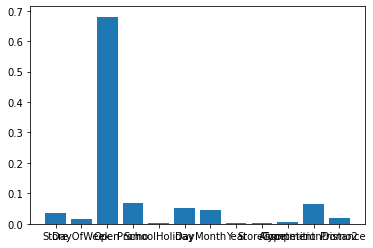

In [210]:
important_features = rfr[1].feature_importances_
plt.bar(feature_columns, important_features)

ValueError: ignored

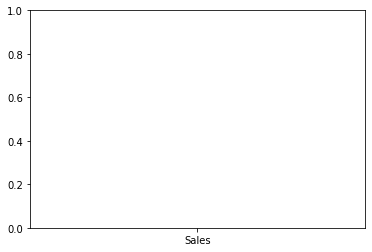

In [218]:
important_features = lr[1].coef_[0]
from matplotlib import pyplot as plt

plt.bar(columns, list(important_features))  

ValueError: ignored

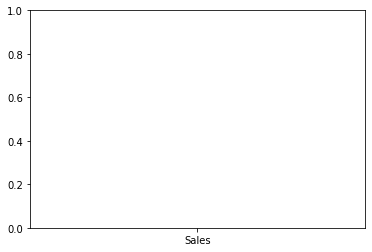

In [220]:
important_features = dt[1].feature_importances_
plt.bar(columns, important_features)

In [ ]:
# Serialize models

In [216]:
# use picke to dump mode
## decomment picke to save the model

reg_model_file_name = f'../models/reg-{datetime.now()}.pkl'
lr_model_file_name = f'../models/lt-{datetime.now()}.pkl'
dt_model_file_name = f'../models/dt-{datetime.now()}.pkl'

files = [reg_model_file_name, lr_model_file_name, dt_model_file_name]
models = [rfr, lr, dt]

print(reg_model_file_name)


# for i in range(len(files)):
#         pickle.dump(models[i], open(files[i], 'wb'))

AttributeError: ignored